In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import itertools
from time import sleep
import os
import seaborn as sns
from itertools import chain


In [2]:
# get the DF used for setting the weights and analysis
print datetime.datetime.now()
validFilePaths = []
for f in os.listdir("data/anomaly_data"):
    filePath = os.path.join("data/anomaly_data", f)
    if os.path.isdir(filePath):
        continue
    if os.stat(filePath).st_size <= 3:
        continue
    validFilePaths.append(filePath)
    
numF = int(0.5 * len(validFilePaths))
print 'Using this many files {0}'.format(numF)
validFilePaths = np.random.choice(validFilePaths, numF, replace=False)
df_list = (pd.read_csv(f) for f in validFilePaths)
df = pd.concat(df_list, ignore_index=True)
df1 = df[df['radiant_win'].notnull()]

2017-05-28 13:01:32.890043
Using this many files 4978


In [3]:

df2 = pd.DataFrame(np.loadtxt('data/goodAnomaliesResidual.csv', delimiter = ','), 
                 columns = ["match_id", "residual"])

df = df1.merge(df2, left_on='match_id', right_on='match_id')

matchDictionary = {}
heroColumns = [filter(lambda x: z in x, df.columns) for z in ['hero_id']][0]

# for each row, this function will return all the heroes that the match belongs in
# for example, if the match had an AM and Spectre, we should place this match in each of those bags
def heroesForMatch(row):
    pass

In [4]:
df = df[~df['match_id'].duplicated()]

In [5]:
df = df.sort_values(by='residual', ascending=False)

In [6]:
columns = df.columns
numericalFeatures = ['match_id', 'positive_votes', 'negative_votes', 'first_blood_time', 'radiant_win',
                    'duration', 'kills', 'deaths', 'assists', 'apm', 'kpm', 'kda', 'hero_dmg',
                    'gpm', 'hero_heal', 'xpm', 'totalgold', 'totalxp', 'lasthits', 'denies',
                    'tower_kills', 'courier_kills', 'gold_spent', 'observer_uses', 'sentry_uses',
                    'ancient_kills', 'neutral_kills', 'camps_stacked', 'pings', 'rune_pickups', 'residual']
numFeatures = [filter(lambda x: z in x, columns) for z in numericalFeatures]
numFeatures = list(chain(*numFeatures))
df = df[numFeatures]

In [7]:
df['match_id'].values.tolist()

[3123250944,
 3123836672,
 3123873280,
 3123800064,
 3123906560,
 3123271936,
 3123164928,
 3123730176,
 3123365632,
 3123386368,
 3123863552,
 3123284224,
 3123681280,
 3123471104,
 3123589888,
 3123094016,
 3123779328,
 3122994688,
 3123663360,
 3123057408,
 3123095552,
 3123486720,
 3123404544,
 3123678976,
 3123207424,
 3123082240,
 3123564288,
 3123057664,
 3123667200,
 3123003904,
 3123871232,
 3123542016,
 3123043072,
 3123352576,
 3123910912,
 3123553024,
 3123449344,
 3123028736,
 3123625216,
 3123068416,
 3123666688,
 3123352064,
 3123194368,
 3123582976,
 3122989056,
 3123261440,
 3122991360,
 3123874304,
 3123269376,
 3123020544,
 3123660288,
 3123847936,
 3123257088,
 3123458048,
 3123060992,
 3123442944,
 3123371264,
 3123790592,
 3123929856,
 3123369728,
 3123340288,
 3123776000,
 3123744256,
 3123484416,
 3123740928,
 3123335168,
 3123740416,
 3123224064,
 3123148288,
 3123373568,
 3123591168,
 3123707136,
 3123423488,
 3123472640,
 3123795968,
 3123113984,
 3123356672,

In [8]:
df['residual'].values.tolist()

[21.23417091369629,
 20.924365997314453,
 18.312454223632812,
 18.2866268157959,
 17.769739151000977,
 17.649425506591797,
 16.933002471923828,
 16.63404083251953,
 16.43926429748535,
 16.420900344848633,
 16.36215591430664,
 16.211353302001953,
 15.81419849395752,
 15.667449951171875,
 15.630619049072266,
 14.945989608764648,
 14.812270164489746,
 14.65152645111084,
 14.547149658203125,
 14.210748672485352,
 14.168844223022461,
 14.036528587341309,
 13.483569145202637,
 13.472919464111328,
 13.40774917602539,
 13.1610689163208,
 13.118196487426758,
 13.103710174560547,
 13.014297485351562,
 12.850004196166992,
 12.750572204589844,
 12.687042236328125,
 12.632912635803223,
 12.579961776733398,
 12.50808048248291,
 12.298011779785156,
 12.145584106445312,
 11.833992958068848,
 11.737639427185059,
 11.689231872558594,
 11.595903396606445,
 11.342506408691406,
 11.198140144348145,
 11.162935256958008,
 10.986268043518066,
 10.943679809570312,
 10.406879425048828,
 10.332125663757324,
 9.9

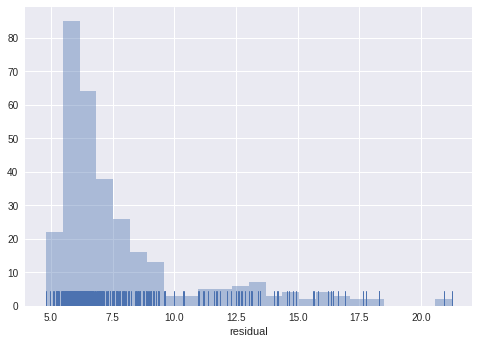

In [9]:
sns.distplot(df['residual'],  kde=False, rug=True)
plt.show()

In [10]:
len(df)

315

In [11]:
plt.close()

In [12]:
residuals = df['residual'].values.tolist()

In [13]:
np.max(residuals) - np.min(residuals)

16.448413848876953

In [14]:
df['residual']

296    21.234171
196    20.924366
251    18.312454
255    18.286627
118    17.769739
84     17.649426
140    16.933002
153    16.634041
231    16.439264
94     16.420900
287    16.362156
239    16.211353
40     15.814198
147    15.667450
223    15.630619
69     14.945990
91     14.812270
82     14.651526
80     14.547150
77     14.210749
284    14.168844
248    14.036529
51     13.483569
11     13.472919
43     13.407749
125    13.161069
78     13.118196
101    13.103710
35     13.014297
79     12.850004
         ...    
105     5.563738
298     5.543775
0       5.515870
156     5.497108
293     5.492200
124     5.490740
54      5.485778
23      5.482734
2       5.470408
102     5.467198
131     5.464407
263     5.437362
224     5.433139
74      5.413378
73      5.303561
6       5.300011
96      5.294446
171     5.284157
160     5.254524
10      5.252199
123     5.249025
45      5.244771
271     5.236786
259     5.222927
189     5.215235
269     5.201863
98      5.125827
170     5.0877

In [15]:
def RadiantDireDifference(row, column):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    radiantSum = 0
    direSum = 0
    for pos in poss:
        radiantSum += row['radiant_'+ pos + '_' + column]
        direSum += row['dire_'+ pos + '_' + column]
    return radiantSum - direSum

def reject_outliers(data, m=1.5):
    return abs(data - np.mean(data)) < m * np.std(data)


def heroKDAdeficit(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_kills'] + \
                        row[fac + '_' + pos + '_assists'] - \
                        row[fac + '_' + pos + '_deaths']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = value
    return returnVal

def heroKDdeficit(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_kills'] - \
                        row[fac + '_' + pos + '_deaths']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = value
    return returnVal

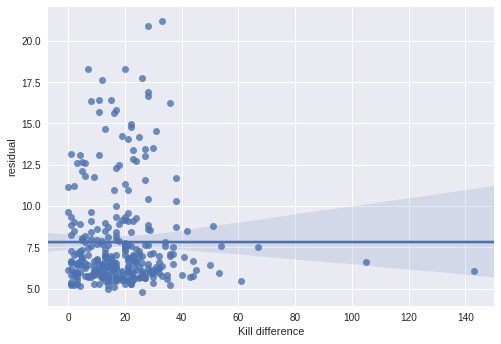

In [16]:
kill_difference = np.abs(df.apply(RadiantDireDifference, args=('kills',), axis=1))
sns.regplot(kill_difference, df['residual'])
ax = plt.gca()
ax.set_xlabel("Kill difference")
plt.show()

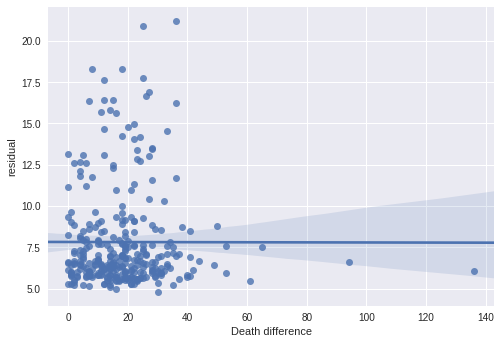

In [17]:
death_difference = df.apply(RadiantDireDifference, args=('deaths',), axis=1)
sns.regplot(np.abs(death_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("Death difference")
plt.show()

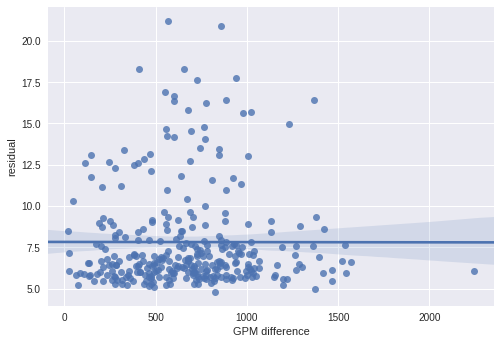

In [18]:
gold_difference = df.apply(RadiantDireDifference, args=('gpm',), axis=1)
sns.regplot(np.abs(gold_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("GPM difference")
plt.show()

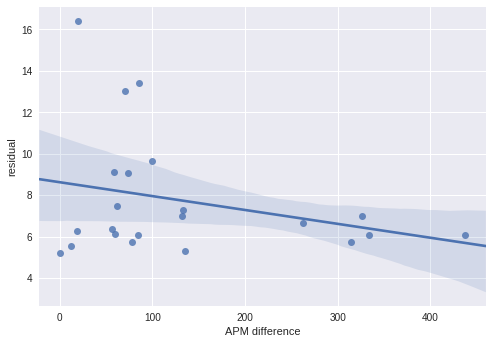

In [19]:
apm_difference = df.apply(RadiantDireDifference, args=('apm',), axis=1)
sns.regplot(np.abs(apm_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("APM difference")
plt.show()

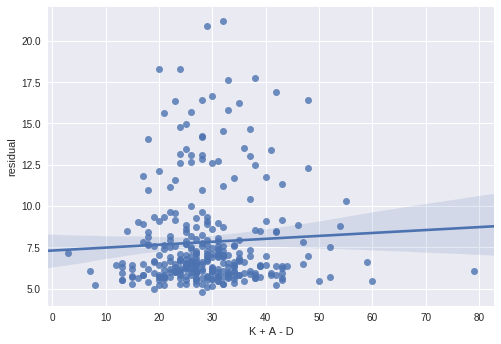

In [20]:
kda = df.apply(heroKDAdeficit, axis=1)
sns.regplot(kda, df['residual'])
ax = plt.gca()
ax.set_xlabel("K + A - D")
plt.show()

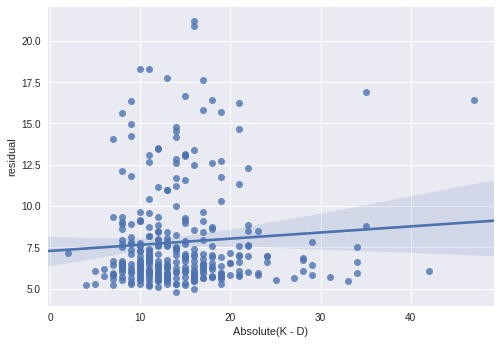

In [21]:
kd = df.apply(heroKDdeficit, axis=1)
sns.regplot(np.abs(kd), df['residual'])
ax = plt.gca()
ax.set_xlabel("Absolute(K - D)")
plt.show()

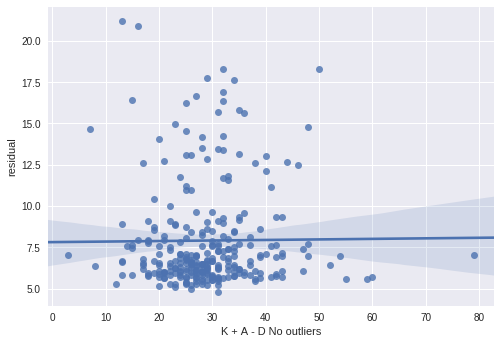

In [22]:
kda = df.apply(heroKDAdeficit, axis=1)
kda_mean = np.mean(kda)
kda_std = np.std(kda)
indices = np.where(np.logical_and(kda <= kda_mean + 1.5*kda_std, kda >= kda_mean-1.5*kda_std))[0]
sns.regplot(kda[indices], df['residual'].iloc[indices])
ax = plt.gca()
ax.set_xlabel("K + A - D No outliers")
plt.show()

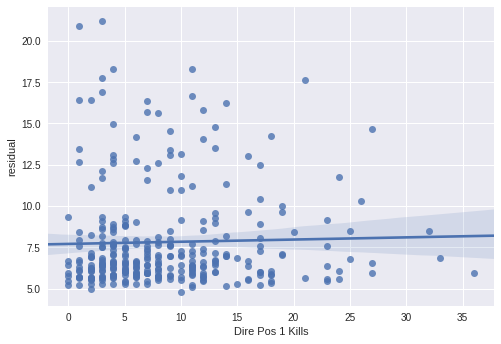

In [23]:
sns.regplot(df['dire_pos1_kills'], df['residual'])
ax = plt.gca()
ax.set_xlabel("Dire Pos 1 Kills")
plt.show()

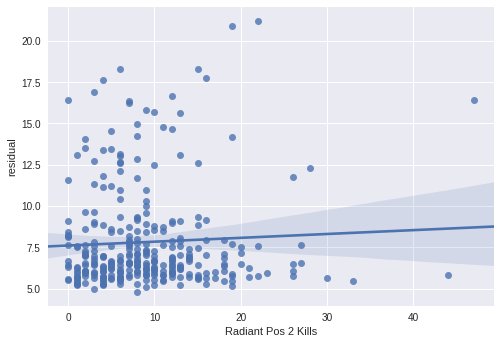

In [24]:
sns.regplot(df['radiant_pos2_kills'], df['residual'])
ax = plt.gca()
ax.set_xlabel("Radiant Pos 2 Kills")
plt.show()

In [25]:
df[df['residual'] > 17]

,match_id,positive_votes,negative_votes,first_blood_time,radiant_win,duration,dire_pos1_ancient_kills,dire_pos1_courier_kills,dire_pos1_kills,dire_pos1_neutral_kills,...,dire_pos2_rune_pickups,dire_pos3_rune_pickups,dire_pos4_rune_pickups,dire_pos5_rune_pickups,radiant_pos1_rune_pickups,radiant_pos2_rune_pickups,radiant_pos3_rune_pickups,radiant_pos4_rune_pickups,radiant_pos5_rune_pickups,residual
296,3123250944,0,0,9,True,2109,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.234171
196,3123836672,0,0,389,True,2154,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.924366
251,3123873280,0,0,240,True,1970,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.312454
255,3123800064,0,0,54,False,2734,NaN,NaN,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.286627
118,3123906560,0,0,85,True,2385,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.769739
84,3123271936,0,0,232,False,2849,NaN,NaN,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.649426


In [26]:
df[df['residual'] < 7.5].sample(10, random_state=1)

,match_id,positive_votes,negative_votes,first_blood_time,radiant_win,duration,dire_pos1_ancient_kills,dire_pos1_courier_kills,dire_pos1_kills,dire_pos1_neutral_kills,...,dire_pos2_rune_pickups,dire_pos3_rune_pickups,dire_pos4_rune_pickups,dire_pos5_rune_pickups,radiant_pos1_rune_pickups,radiant_pos2_rune_pickups,radiant_pos3_rune_pickups,radiant_pos4_rune_pickups,radiant_pos5_rune_pickups,residual
2,3123879680,0,0,89,False,4543,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.470408
157,3123855872,0,0,140,False,3009,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.719864
127,3123509248,0,0,238,False,2240,NaN,NaN,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.667886
271,3123581184,0,0,169,True,3055,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.236786
210,3123564800,0,0,2,False,3194,NaN,NaN,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.554526
136,3123661824,0,0,70,True,1966,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.884769
58,3123737088,0,0,79,True,2195,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.750428
148,3123031040,0,0,177,False,2565,NaN,NaN,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.074661
189,3123672064,0,0,121,True,873,0.0,0.0,0,0.0,...,2.0,9.0,4.0,2.0,4.0,3.0,2.0,3.0,1.0,5.215235
42,3123836928,0,0,139,True,3061,NaN,NaN,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.511131
